In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [4]:
# Get only the cubes that have our line of interest in them
mol_tag = 30503
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=3>
   FREQ     ERR    LGINT    DR    ELO    GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l     name   Lab 
   MHz      MHz   MHz nm2        1 / cm         u                                                                                                     
 float64  float64 float64 int64 float64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64    str9   bool
--------- ------- ------- ----- ------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- --------- ----
107288.55    0.05 -5.7528     2    -0.0     4    30   503   112     1     2    --    --    --    --     0     3    --    --    --    -- C-13-O-17 True
107288.55    0.05 -5.4518     2    -0.0     8    30   503   112     1     4    --    --    --    --     0     3    --    --    --    -- C-13-O-17 True
107289.65    0.05 -5.5767     2    -0.0     6    30   503   112     1     3 

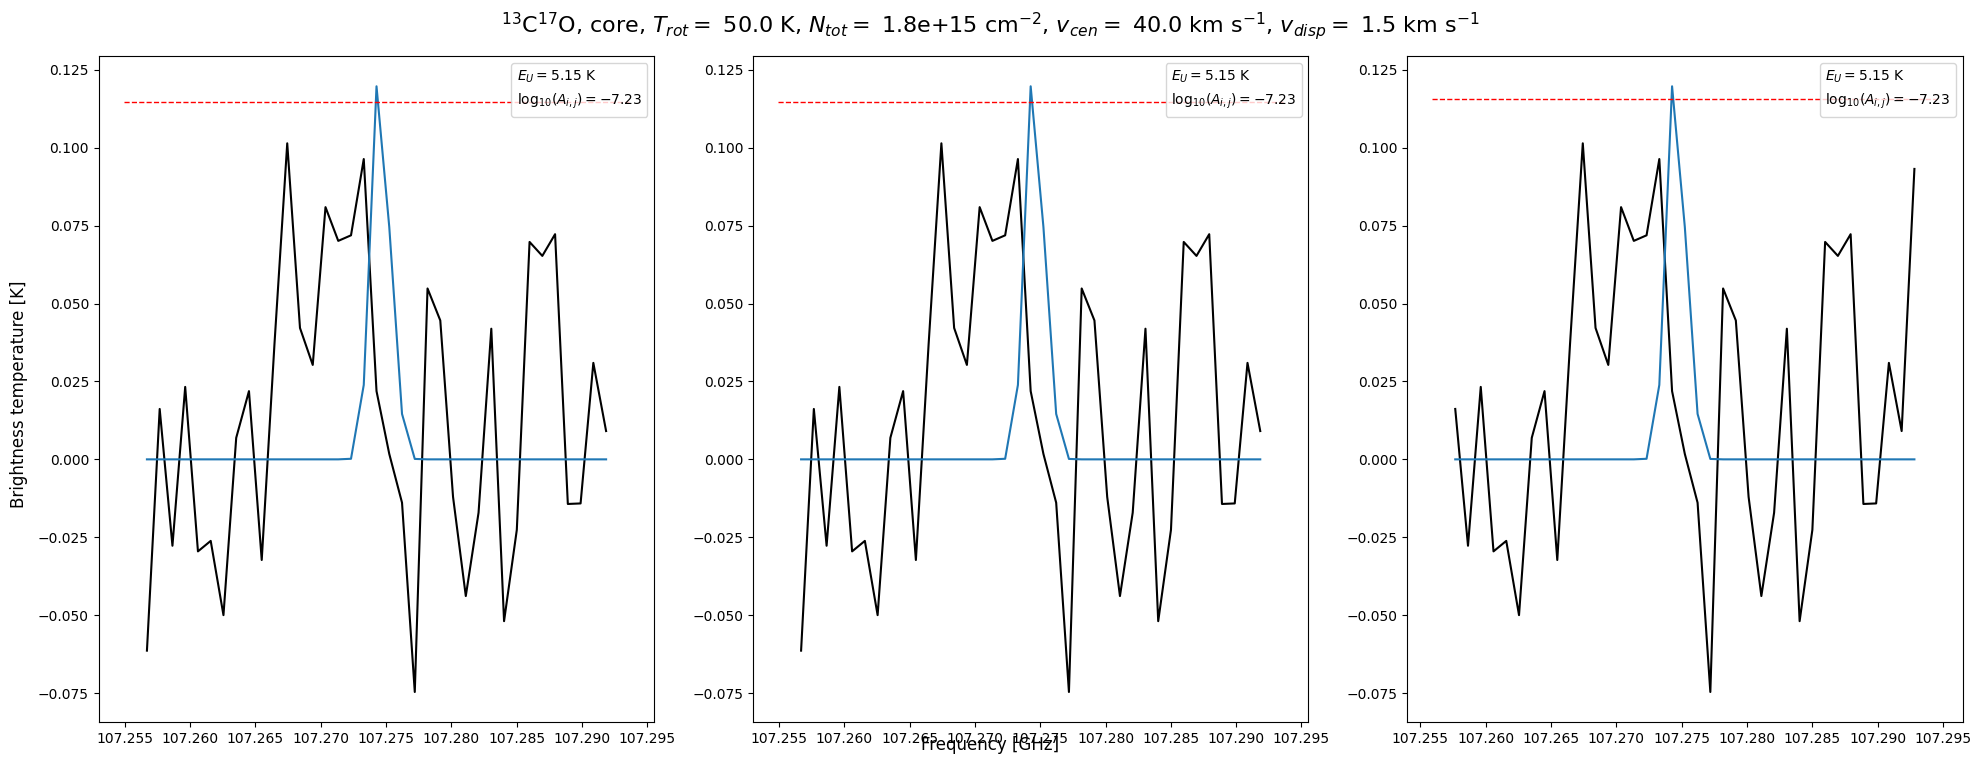

In [10]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 1.8e+15, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=8, 
               nrows=1, ncols=3, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'$^{{13}}$C$^{{17}}$O', extr_type="coord", crd=crd, 
               aij_cutoff=-8, show_2_sigma=True)

In [6]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

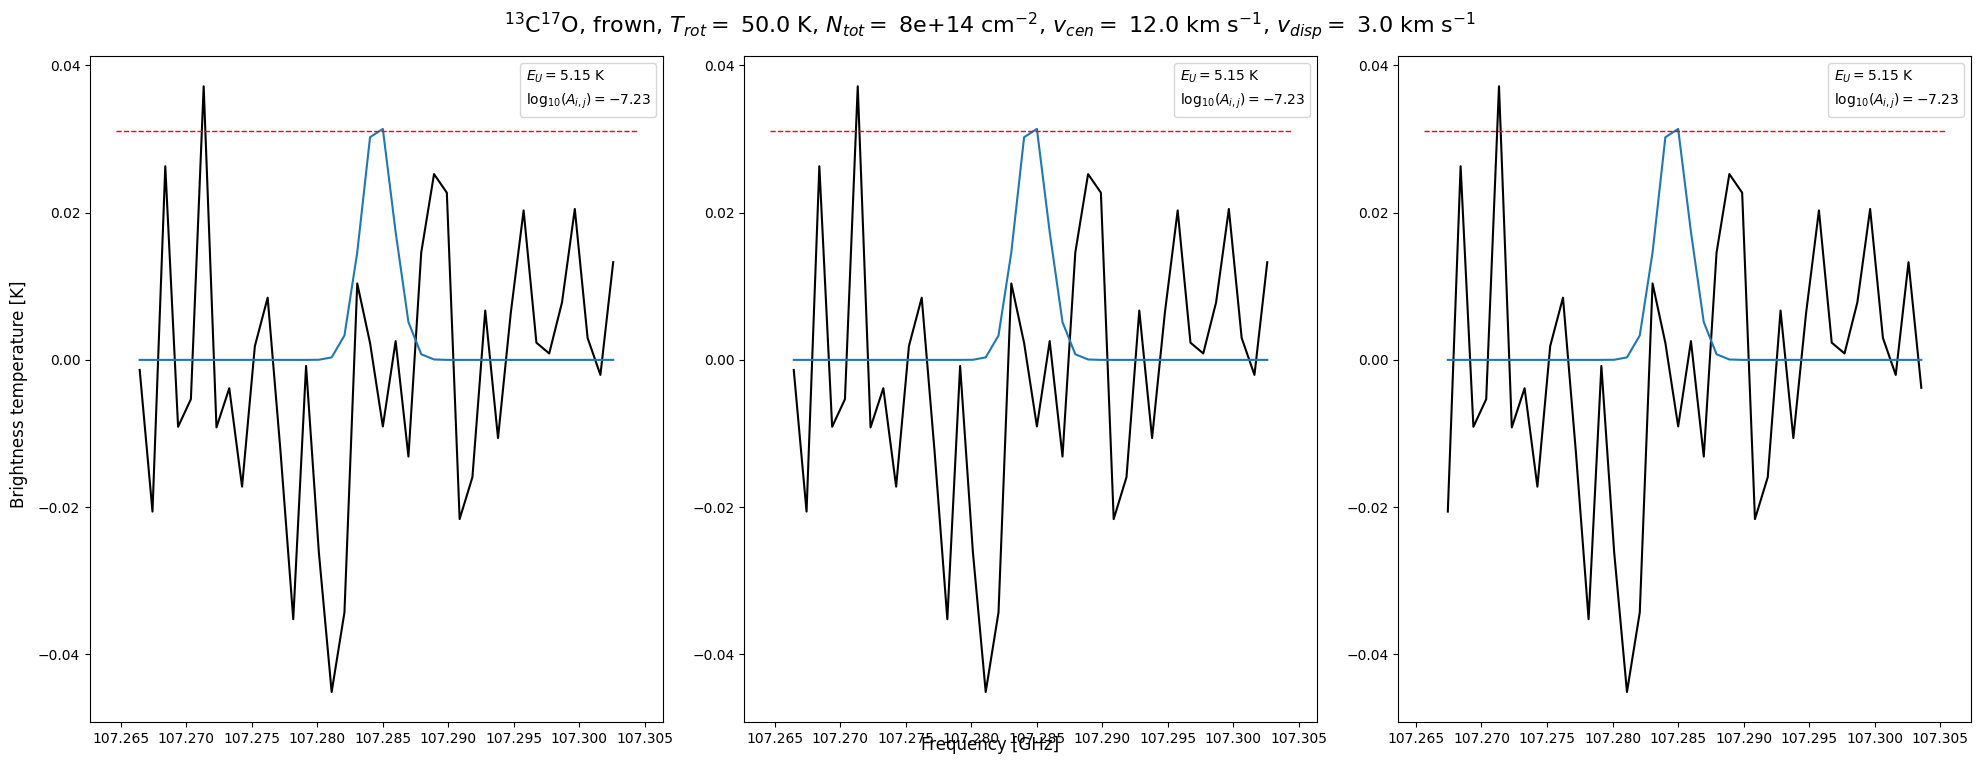

In [11]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 8.0e+14, v_cen = 12*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=8, 
                       nrows=1, ncols=3, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'$^{{13}}$C$^{{17}}$O', extr_type="reg", 
                       aij_cutoff=-8, show_2_sigma=True, return_freqs=True)

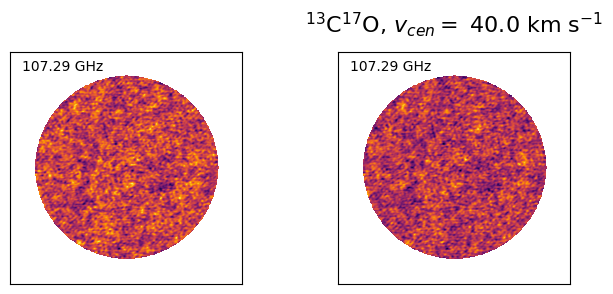

In [8]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40*u.km/u.s, fig_width=10, fig_height=8, nrows=1, ncols=2, name_for_plot=f'$^{{13}}$C$^{{17}}$O')

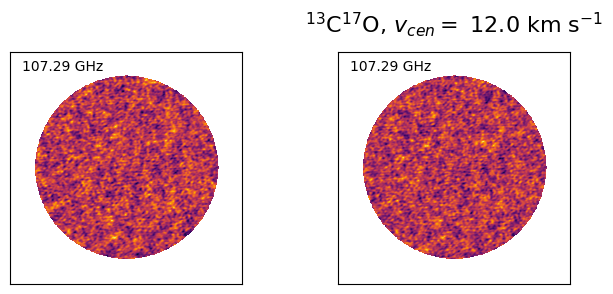

In [9]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12*u.km/u.s, fig_width=10, fig_height=8, nrows=1, ncols=2, name_for_plot=f'$^{{13}}$C$^{{17}}$O')